# Meshing

## 1. Prerequisites

### 1.1 Load cloud point of voxel centers

NOT using graph editor observer No module named grapheditor


<IPython.core.display.Javascript object>


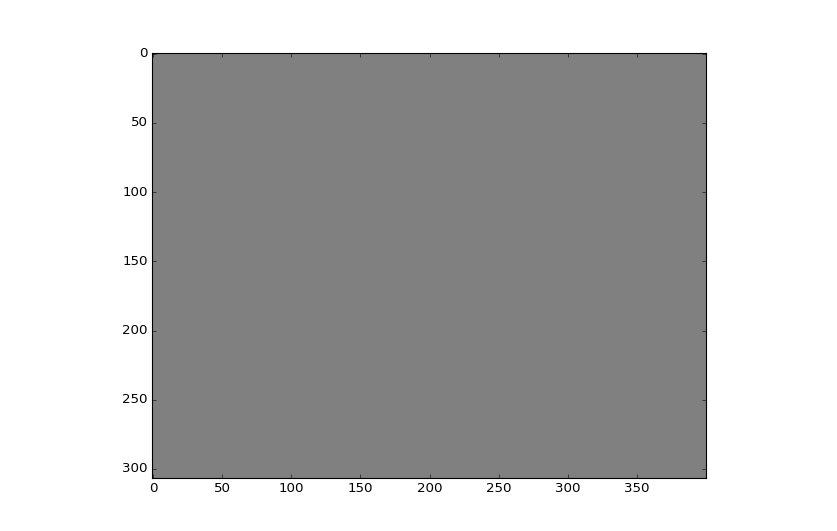

In [1]:
%matplotlib notebook

from alinea.phenomenal.data_access.plant_1 import plant_1_voxel_centers
from alinea.phenomenal.display import (
    show_points_3d, show_image)

voxel_size = 4
voxel_centers = plant_1_voxel_centers(voxel_size=voxel_size)

# Display it
im = show_points_3d(voxel_centers, scale_factor=voxel_size)
# Documentation image incrustation
show_image(im)

In [2]:
from alinea.phenomenal.data_structure import voxel_centers_to_image_3d

# Convert voxel_centers to image3D
image_3d = voxel_centers_to_image_3d(voxel_centers, voxel_size)

## 2. Meshing

### 2.1 Do meshing

In [3]:
from alinea.phenomenal.mesh.algorithms import meshing


vertices, faces = meshing(image_3d,
                          reduction=0.95, 
                          smoothing_iteration=2, 
                          verbose=True)

Marching cubes :
	Iso value : 1.0

	There are 53611 points.
	There are 107980 polygons.

Smoothing :
	Feature angle : 120.0
	Number of iteration : 2
	Pass band : 0.01

Decimation :
	Reduction (percentage) : 0.95

	Before decimation
	-----------------
	There are 53611 points.
	There are 107980 polygons.

	After decimation
	-----------------
	There are 2708 points.
	There are 5399 polygons.


### 2.3 Read & write

In [4]:
from alinea.phenomenal.mesh.formats import (
    write_vertices_faces_to_json_file,
    read_json_file_to_vertices_faces)

# Write
write_vertices_faces_to_json_file(vertices, faces, 'mesh.json')

# Read
vertices, faces = read_json_file_to_vertices_faces('mesh.json')

### 2.4 Display it

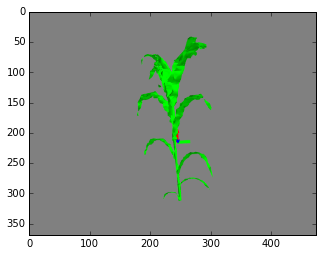

In [5]:
%matplotlib inline

from alinea.phenomenal.display.mesh import show_mesh

im = show_mesh(vertices, faces)
# Documentation image incrustation
show_image(im)

### 2.5 Normals of each faces

<IPython.core.display.Javascript object>


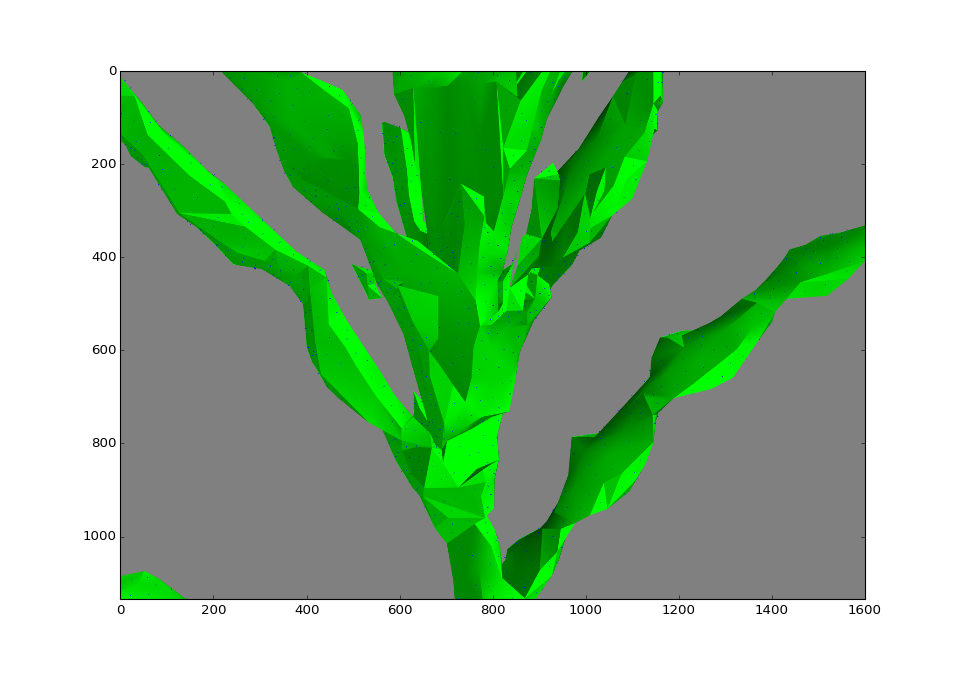

In [6]:
%matplotlib notebook

from alinea.phenomenal.mesh.routines import normals, centers

normals = normals(vertices, faces)
centers = centers(vertices, faces)

# Display it
im = show_mesh(vertices, faces, normals=normals, centers=centers)
# Documentation image incrustation
show_image(im)

### 2.6. Surface area estimation

In [7]:
import skimage.measure

surface = skimage.measure.mesh_surface_area(vertices, faces)

print 'Mesh surface area : ', surface

Mesh surface area :  923898.25253


## 3. PlantGL Format

### 3.1 Add mesh to PantGL scene and display it

In [ ]:
import openalea.plantgl.scenegraph as sg
import openalea.plantgl.all as pgl

scene = sg.Scene()
tset = sg.FaceSet(pointList=vertices, indexList=faces)
scene += tset

# Display it
pgl.Viewer.display(scene)